# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

# 1. Importing Packages

In [103]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import skew
#ignoring warnings
import warnings
warnings.simplefilter(action='ignore')
import datetime

# Libraries for data preparation and model building
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
# saving my model
import pickle

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 0.01

# 2. Loading the Data
 

In [104]:
#making sure that we can see all rows and cols
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#reading the data from the csv


In [105]:

df = pd.read_csv('df_train.csv')
test_df = pd.read_csv('df_test.csv')
df_test = test_df.copy()
df_1 = df.copy()


# 3. Exploratory Data Analysis (EDA)

In [106]:
#From the shape it is observed that the DataFrame has 8763 rows and 49 columns

df_1.shape

(8763, 49)

In [107]:
#The DataFrame has 1 column that has Null values 
#3 columns with 'object' data type 

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [108]:
#Filing in the NAN with mean() as it was observed above that Valencia_pressure has null values

df_1['Valencia_pressure'].fillna(df_1['Valencia_pressure'].mean(), inplace=True)

In [109]:
df_1['time'] = pd.to_datetime(df_1['time']) # changing the date datatype

test_df['time'] = pd.to_datetime(test_df['time']) # changing the date datatype
#cols_to_drop = [item for item in df.columns if 'weather' in item or '_deg' in item]

df_test.drop('Unnamed: 0',inplace = True,axis = 1) #deleting the first column

df_1.drop('Unnamed: 0',inplace = True,axis = 1) #deleting the first column

In [110]:
cols_to_drop = ['Bilbao_rain_1h','Bilbao_wind_deg','Barcelona_pressure','Barcelona_wind_deg',
               'Barcelona_rain_1h','Seville_rain_1h','Bilbao_pressure','Madrid_pressure','Valencia_pressure']

cols = [item for item in df_1.columns if 'max' in item or 'min' in item or '1h' in item]

cols_to = cols_to_drop + cols

df_1.drop(cols_to, inplace = True, axis = 1)

test_df.drop(cols_to, inplace = True, axis = 1)

In [111]:


#Changing Dtypes of 'time' from object to 'datetime64'
#Changing Dtypes of 'Valencia_wind_deg', 'Seville_pressure' from object to 'category'


cat_cols = [item for item in df_1.columns if 'pressure' in item or 'deg' in item]

test_cols = [item for item in test_df.columns if 'pressure' in item or 'deg' in item]

df_1[cat_cols] = df_1[cat_cols].astype('category')

test_df[test_cols] = test_df[test_cols].astype('category')

In [112]:
#Encoding 'Valencia_wind_deg', 'Seville_pressure' from 'category' to numeric values using 'cat.codes'


df_1['Valencia_wind_deg'] = df_1['Valencia_wind_deg'].cat.codes


df_1['Seville_pressure'] = df_1['Seville_pressure'].cat.codes

In [113]:
#Encoding 'Valencia_wind_deg', 'Seville_pressure' from 'category' to numeric values using 'cat.codes'


test_df['Valencia_wind_deg'] = test_df['Valencia_wind_deg'].cat.codes


test_df['Seville_pressure'] = test_df['Seville_pressure'].cat.codes

In [114]:
#extracing the date from date time

df_1['month'] = df_1['time'].dt.month
df_1['day'] = df_1['time'].dt.day
df_1['time'] = df_1['time'].dt.time

test_df['month'] = test_df['time'].dt.month
test_df['day'] = test_df['time'].dt.day
test_df['time'] = test_df['time'].dt.time

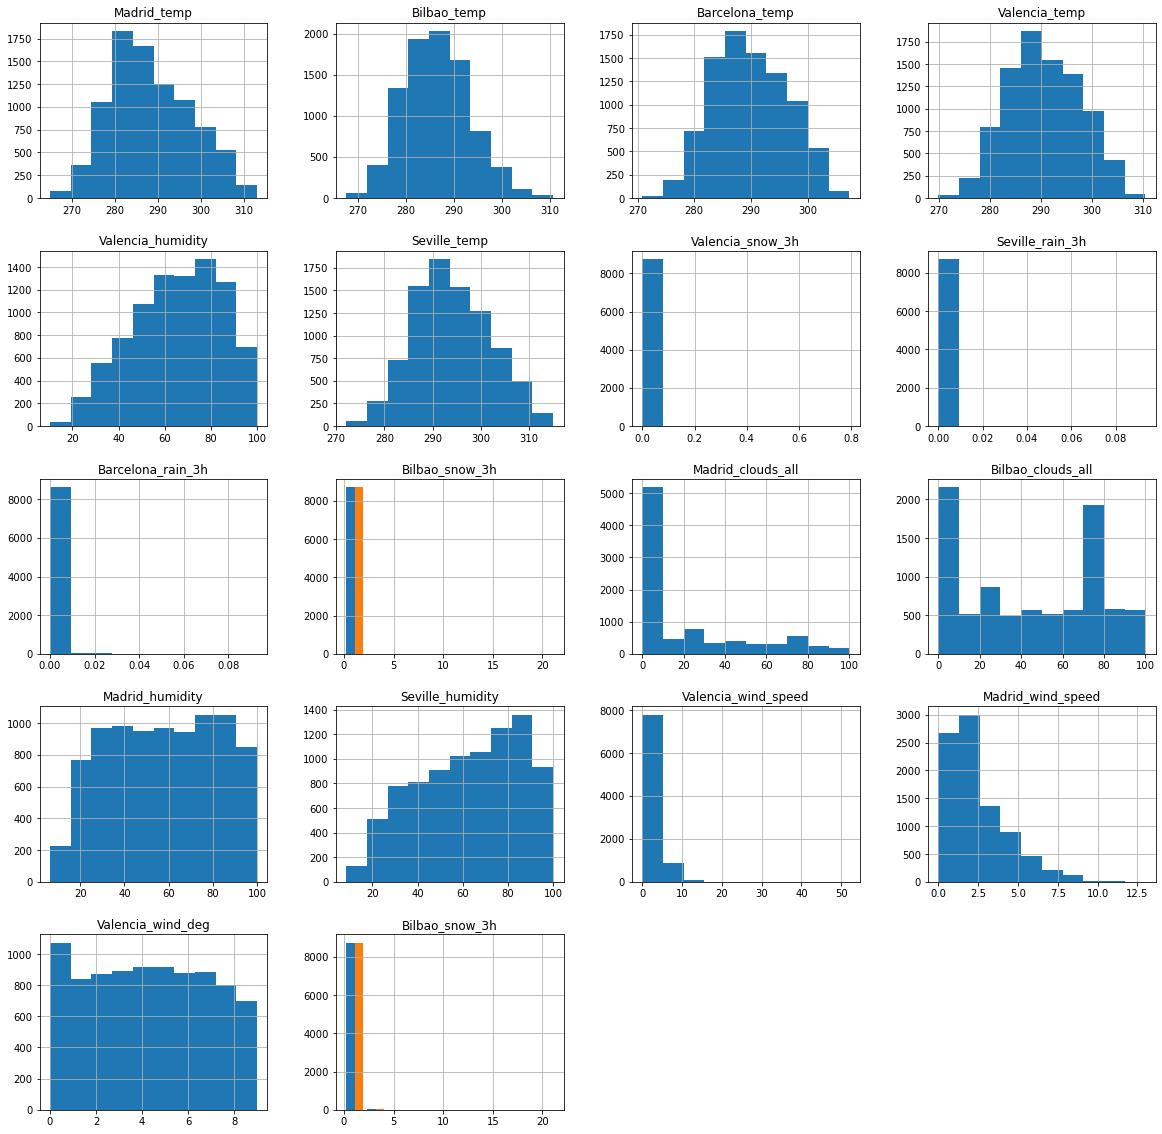

In [115]:
features  = ['Madrid_temp', "Bilbao_temp", 'Barcelona_temp', "Valencia_temp", "Valencia_humidity","Seville_temp", "Valencia_snow_3h", "Seville_rain_3h", "Barcelona_rain_3h", "Bilbao_snow_3h", "Madrid_clouds_all", "Bilbao_clouds_all", "Madrid_humidity", "Seville_humidity", "Valencia_wind_speed", "Madrid_wind_speed", "Valencia_wind_deg", "Bilbao_snow_3h"]
df_1[features].hist(figsize=(20,20));

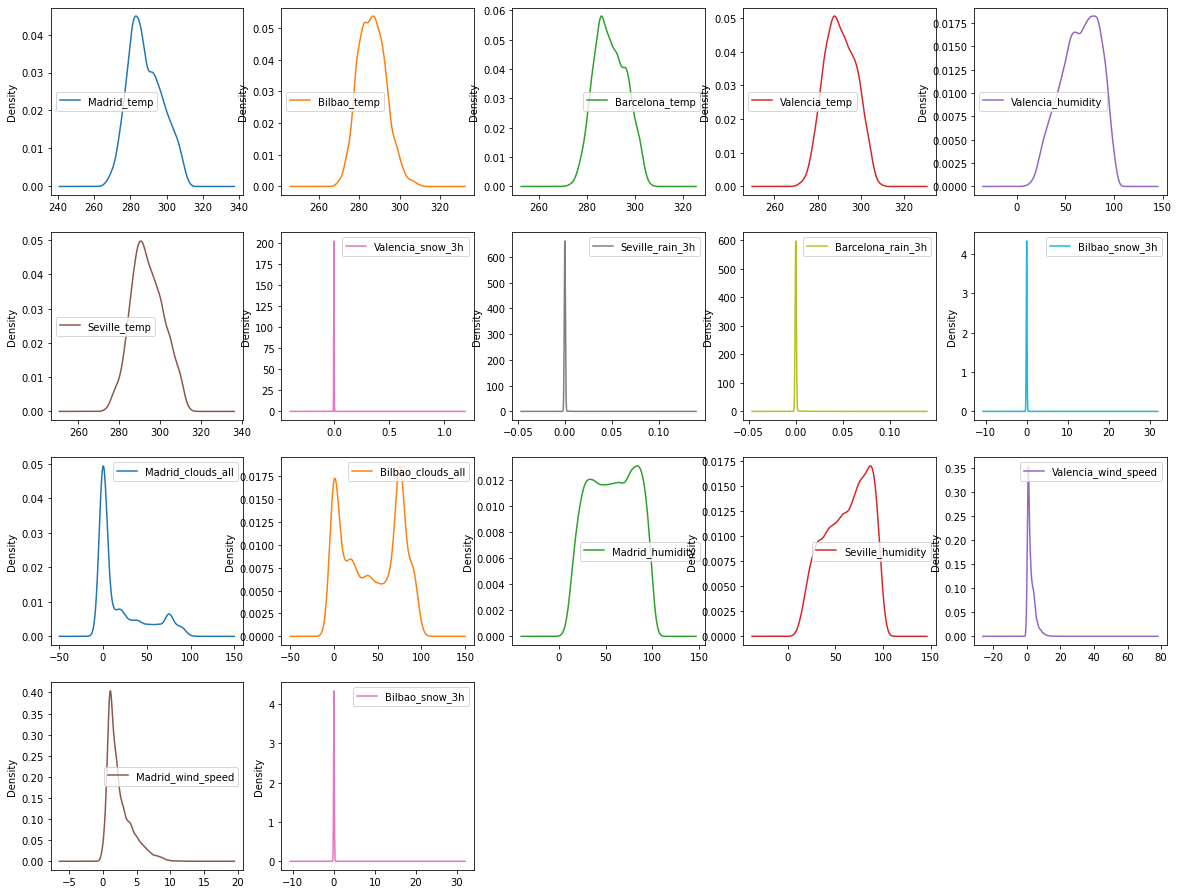

In [116]:
df[features].plot(kind='density', subplots=True, layout=(5, 5), sharex=False, figsize=(20, 20));

In [117]:
df_1.corr()

,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Barcelona_wind_speed,Madrid_clouds_all,Seville_wind_speed,Seville_pressure,Bilbao_snow_3h,Seville_rain_3h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Seville_weather_id,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Barcelona_temp,Bilbao_temp,Madrid_temp,load_shortfall_3h,month,day
Madrid_wind_speed,1.000000,0.104954,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.294640,0.230126,0.434104,-0.026246,0.071183,0.004795,-0.014644,0.021660,-0.169358,-0.099582,-0.120014,0.128726,-0.238128,0.090861,-0.285787,0.080133,0.060467,0.109572,-0.150981,-0.237445,-0.029954
Valencia_wind_deg,0.104954,1.000000,0.204874,0.141594,0.171478,0.074476,0.112475,0.109314,0.116735,0.129917,0.007634,-0.043797,-0.005715,-0.007180,0.015736,-0.003976,-0.027027,-0.000043,-0.020651,-0.084541,-0.099664,-0.151280,-0.198984,-0.113788,-0.099050,-0.166092,-0.110849,-0.087571,-0.025467
Valencia_wind_speed,0.513092,0.204874,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.347966,0.221887,0.316035,-0.010144,0.115133,0.027637,-0.037553,0.058629,-0.099056,-0.037605,-0.069092,0.072366,-0.201379,-0.008508,-0.413017,-0.021456,-0.022676,-0.011982,-0.142791,-0.237156,-0.000340
Seville_humidity,-0.117892,0.141594,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.138625,0.366602,-0.202449,-0.056700,0.023556,0.034343,0.015555,0.007351,-0.228442,-0.050515,-0.328265,-0.663276,-0.105088,-0.743126,0.464012,-0.617797,-0.604733,-0.717171,-0.167290,-0.111622,0.032979
Madrid_humidity,-0.137092,0.171478,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.058518,0.484293,-0.125680,-0.070508,0.031653,0.059958,0.017797,0.012571,-0.341407,-0.051139,-0.291095,-0.706989,-0.139686,-0.738819,0.378980,-0.684867,-0.634825,-0.802605,-0.150536,-0.076567,0.047372
Bilbao_clouds_all,0.244001,0.074476,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.094019,0.109788,0.075066,0.001263,0.080180,0.009557,-0.041013,0.024339,-0.080837,-0.124169,-0.033825,-0.000299,-0.536205,-0.095003,-0.129684,-0.023171,-0.114118,-0.046686,-0.127293,-0.117452,0.025688
Bilbao_wind_speed,0.377854,0.112475,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.275317,0.239326,0.213420,-0.033655,-0.001642,-0.026037,-0.038246,-0.008114,-0.101497,-0.003074,-0.086691,0.093919,-0.031661,0.080357,-0.279825,0.018967,0.142435,0.031245,-0.081602,-0.086698,-0.008020
Seville_clouds_all,0.191251,0.109314,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.136591,0.552414,0.144119,-0.080132,0.001718,0.087240,0.029194,-0.009782,-0.376157,-0.099166,-0.537924,-0.186982,-0.101888,-0.208859,0.097491,-0.186463,-0.152393,-0.227094,-0.091804,-0.170345,0.010582
Barcelona_wind_speed,0.294640,0.116735,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,1.000000,0.147652,0.212193,-0.017511,0.015752,0.058662,-0.001722,0.030336,-0.106432,-0.048004,-0.090902,0.121330,-0.064746,0.147628,-0.249610,0.116240,0.120361,0.089365,-0.103633,-0.122221,-0.009699
Madrid_clouds_all,0.230126,0.129917,0.221887,0.366602,0.484293,0.109788,0.239326,0.552414,0.147652,1.000000,0.168245,-0.063425,0.041997,0.077246,-0.000355,0.023323,-0.533331,-0.119970,-0.383770,-0.200355,-0.172030,-0.240838,0.066366,-0.223940,-0.174079,-0.262908,-0.081623,-0.118792,0.035940


In [118]:
# selecting the correct columns and in the correct order


column_ = [col for col in df_1.columns if col == 'day' or col == 'time' or col == 'month'] 

others = [item for item in df_1.columns if 'wind'  in item  or  'pressure' in item 
                      or 'cloud' in item or 'humidity' in item or 'Seville_weather' in item or 'Madrid_temp' in item] 

last_col = ['load_shortfall_3h']

column_titles = column_ + others + last_col


column = column_ + others

In [119]:
df_1 = df_1.reindex(columns = column_titles)

In [120]:
df_1['time'] = df_1['time'].astype('category')

df_1['time'] = df_1['time'].cat.codes

In [121]:
#It can be observed from the data below that all the non of the 40 columns have null values 
#and they now all have numeric values 

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   int8   
 1   month                 8763 non-null   int64  
 2   day                   8763 non-null   int64  
 3   Madrid_wind_speed     8763 non-null   float64
 4   Valencia_wind_deg     8763 non-null   int8   
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Seville_pressure      8763 non-null   int8   
 15  Seville_weather_id   

In [122]:
#Majority of the factors contains less outliers in the data 
#kurtosis is <3

df_1.kurtosis()

time                    -1.237868
month                   -1.207760
day                     -1.193873
Madrid_wind_speed        2.036462
Valencia_wind_deg       -1.192548
Valencia_wind_speed     35.645426
Seville_humidity        -1.017983
Madrid_humidity         -1.167537
Bilbao_clouds_all       -1.533417
Bilbao_wind_speed        3.631565
Seville_clouds_all       2.155921
Barcelona_wind_speed     1.493635
Madrid_clouds_all        0.142079
Seville_wind_speed       1.398580
Seville_pressure        -1.155787
Seville_weather_id      10.710308
Valencia_humidity       -0.734345
Madrid_temp             -0.612299
load_shortfall_3h       -0.118999
dtype: float64

In [123]:
df = df_1.copy()

X = df.drop(['load_shortfall_3h','time'], axis = 1)

y = df['load_shortfall_3h']

In [124]:
X_test = test_df[column]
X_t = X_test.drop('time',axis = 1)

In [125]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_t_Scaled = scaler.fit_transform(X_t)

In [126]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 42,
                                                    shuffle = True)


In [127]:
lm = LinearRegression()
    
lm.fit(X_train,y_train)

LinearRegression()

In [128]:
y_hat = lm.predict(X_test)
print('LR RMSE:', np.sqrt(mean_squared_error(y_test, y_hat)))

LR RMSE: 5011.083643429062


In [129]:
lm_y = lm.predict(X_t_Scaled)

pre_dict = {'time':df_test[df_test.columns[0]],'load_shortfall_3h': lm_y} # dictionary containing predicted values

predict_ed = pd.DataFrame(pre_dict) # dataframe with the date and load_shortfall_3h


In [130]:
predict_ed.to_csv('Team.csv',index = False)

,time,load_shortfall_3h
0,2018-01-01 00:00:00,6302.579483
1,2018-01-01 03:00:00,6335.397607
2,2018-01-01 06:00:00,6909.880355
3,2018-01-01 09:00:00,6649.802924
4,2018-01-01 12:00:00,6548.866739
